Data Mining - Task 2

For the data set from the first task, extract association rules using R, Python or Weka software. Set various values for support and confidence and compare the many resulting rules. Identify the rules that can receive a useful interpretation.

Requirement:

1. Association rules for all attributes (support/confidence experiments)
2. Association rules for target. Comment on the possibility to build a classifier
3. Rules explanations and interpretation
4. Visualisations

In [ ]:
library(tidyverse)
library(ggplot2)
library(knitr)
library(dplyr)
library(tidyr)

#install.packages("arules")
library(arules)


In [ ]:
### Unzip the csv with airlines delay and print the table

unzip('airlines_delay.csv.zip')
tabel <- read.csv('airlines_delay.csv', stringsAsFactors = FALSE)
#print(tabel)

In [ ]:
### Separe the numeric and categorical data in two tables (just in case)

name_cols <- colnames(tabel)

numeric_name_cols <- name_cols[sapply(tabel, is.numeric)]
#print(numeric_name_cols)

numeric_cols <- sapply(tabel, is.numeric)
numeric_data <- tabel[, numeric_cols]
#print(numeric_data)

categorical_name_cols <- name_cols[sapply(tabel, is.factor) | sapply(tabel, is.character)]
#print(categorical_name_cols)

categorical_cols <- sapply(tabel, is.factor) | sapply(tabel, is.character)
categorical_data <- tabel[, categorical_cols]
categorical_data <- data.frame(lapply(categorical_data, as.factor))
# print(categorical_data)

Association rules for all atributes (support/confidence experiments)

In [ ]:
# Association rules are important in data analysis because they provide an efficient method of identifying relationships or patterns
# between different variables in a data set. These can be used to discover interesting and useful relationships between variables,
# as well as to make predictions.

# More specifically, association rules identify patterns between objects or events that appear together with a certain frequency
# and refer to causal or associative relationships between them.

### Convert the dataset into a "transaction" object

tabel_trans <- as(tabel[, name_cols], "transactions");
# print(tabel_trans)

# Loading data into a "transaction" object is an important step in the process of extracting association rules.
# Transaction objects are a special type of object from the arules library in R,
# which are used to store data in a form that is easily processed by the association rule extraction algorithm.

# At the code level, the dataset will be converted into a sparse array containing 0 and 1,
# where 1 means the variable was chosen in the transaction and 0 means it was not chosen.

Warning message:
“Column(s) 1, 2, 3, 4, 5, 6, 7, 8 not logical or factor. Applying default discretization (see '? discretizeDF').”
Warning message in discretize(x = c(0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, :
“The calculated breaks are: 0, 0, 1, 1
  Only unique breaks are used reducing the number of intervals. Look at ? discretize for details.”


In [ ]:
### Extract the association rules using the "apriori" function

rules <- apriori(tabel_trans, parameter = list(support = 0.2, confidence = 0.7, maxtime = 10))

### Antecedent (X)

# The antecedent is a set of items or independent variables that appear on the left side of the rule,
# and its role in association rules is to indicate the combinations of items or independent variables
# that are associated with a given set of items or dependent variables.

### Consequent (Y)

# The consequent is a set of items or dependent variables that appear on the right side of the rule and describe the product or event of interest.
# The consequent is what one tries to predict or explain according to the antecedent and the analyzed context.

### Association rule (X → Y)

# The rule indicates that if the antecedent is observed in a data set, then the consequent is likely to be observed as well.

### Parameters for apriori function

# Confidence: represents the probability that the next choice will be Y, given that X was chosen.
# A high level of confidence indicates that there is a strong correlation between the two variables and that the next choice is likely to be Y.

# Minval: represents the minimum confidence level we want to accept a rule as significant.

# Smax: represents the maximum number of elements that can be included in a rule.

# Arem: represents the arithmetic mean of the confidence level for the selected association rules.

# Aval: represents the maximum value allowed for the confidence level.

# OriginalSupport: represents the absolute frequency of the antecedent

# Maxtime: represents the maximum time allowed for analyzing the data set.

# Support: represents the probability of finding a certain set of variables in our data set

# Minlen/Maxlen: represents the minimum/maximum number of items in a set of products to be considered relevant in the data analysis.

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE      10     0.2      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 107876 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[617 item(s), 539382 transaction(s)] done [0.83s].
sorting and recoding items ... [13 item(s)] done [0.03s].
creating transaction tree ... done [0.46s].
checking subsets of size 1 2 done [0.00s].
writing ... [13 rule(s)] done [0.00s].
creating S4 object  ... done [0.17s].


In [ ]:
### View the generated rule set

inspect(rules)

### Support

# Represents the minimum percentage of transactions in which a certain set of items (itemset) appears to be considered relevant in determining association rules.
# In our example, if we set the parameter "support" to 50%, it means that only those itemsets that appear in at least half of the total transactions will be considered
# in the process of generating association rules. The higher the value of this parameter, the lower the number of itemsets considered relevant,
# which can lead to fewer generated rules, but more strongly supported by the data.

# supp(X → Y) = supp(X ⋃ Y) = P(X ⋂ Y)

### Confidence

# This measures the probability of obtaining an event of category Y when event X occurs. So, we can use confidence to filter out rules of lower quality,
# to select only those rules that show a stronger relationship between associated products.
# A common threshold for safety is 0.5, which means we want to select only those rules that have a greater than 50% probability of having event Y when X occurs.

# conf(X → Y) = supp(X ⋃ Y)/supp(X) = P(Y/X) = P(X ⋂ Y)/P(X)

### Lift

# Lift is a measure that tells us how much more likely it is that Y will occur when X occurs, compared to the probability of Y occurring in general.

# lift(X → Y) = supp(X ⋃ Y)/[supp(X) ⋅ supp(Y)] = P(X ⋂ Y)/[P(X)  ⋅ P(Y)]

# In general, the lift can be interpreted as:

# Lift = 1: There is no correlation between antecedent and follow-up; the probability of buying the follow remains the same whether the antecedent is present or not.
# Lift < 1: There is a negative correlation between the antecedent and the follow-up; the likelihood of buying the follow is lower when the antecedent is present than when the antecedent is absent.
# Lift > 1: There is a positive correlation between the antecedent and the follow-up; the likelihood of buying the follow is higher when the antecedent is present than when the antecedent is absent.
# Lift = infinite: There is a perfect correlation between the antecedent and the follow-up; when the antecedent is present, the follow is always present and vice versa.


     lhs                             rhs           support   confidence
[1]  {}                           => {Class=[0,1]} 1.0000000 1         
[2]  {DayOfWeek=[1,3)}            => {Class=[0,1]} 0.2671743 1         
[3]  {Length=[0,91)}              => {Class=[0,1]} 0.3304615 1         
[4]  {Time=[645,955)}             => {Class=[0,1]} 0.3313422 1         
[5]  {Time=[10,645)}              => {Class=[0,1]} 0.3331294 1         
[6]  {Flight=[1,1.04e+03)}        => {Class=[0,1]} 0.3332740 1         
[7]  {Flight=[1.04e+03,2.83e+03)} => {Class=[0,1]} 0.3333055 1         
[8]  {Flight=[2.83e+03,7.81e+03]} => {Class=[0,1]} 0.3334205 1         
[9]  {Length=[145,655]}           => {Class=[0,1]} 0.3336300 1         
[10] {Time=[955,1.44e+03]}        => {Class=[0,1]} 0.3355284 1         
[11] {Length=[91,145)}            => {Class=[0,1]} 0.3359085 1         
[12] {DayOfWeek=[3,5)}            => {Class=[0,1]} 0.3359233 1         
[13] {DayOfWeek=[5,7]}            => {Class=[0,1]} 0.3969024 1  

In [ ]:
rules1 <- apriori(tabel_trans, parameter = list(support = 0.1, confidence = 0.5, maxtime = 10, maxlen = 2))
inspect(rules1)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE      10     0.1      1
 maxlen target  ext
      2  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 53938 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[617 item(s), 539382 transaction(s)] done [0.73s].
sorting and recoding items ... [15 item(s)] done [0.03s].
creating transaction tree ... done [0.49s].
checking subsets of size 1 2

Warning message in apriori(tabel_trans, parameter = list(support = 0.1, confidence = 0.5, :
“Mining stopped (maxlen reached). Only patterns up to a length of 2 returned!”


 done [0.01s].
writing ... [15 rule(s)] done [0.00s].
creating S4 object  ... done [0.17s].
     lhs                             rhs           support   confidence
[1]  {}                           => {Class=[0,1]} 1.0000000 1         
[2]  {Airline=DL}                 => {Class=[0,1]} 0.1129812 1         
[3]  {Airline=WN}                 => {Class=[0,1]} 0.1744534 1         
[4]  {DayOfWeek=[1,3)}            => {Class=[0,1]} 0.2671743 1         
[5]  {Length=[0,91)}              => {Class=[0,1]} 0.3304615 1         
[6]  {Time=[645,955)}             => {Class=[0,1]} 0.3313422 1         
[7]  {Time=[10,645)}              => {Class=[0,1]} 0.3331294 1         
[8]  {Flight=[1,1.04e+03)}        => {Class=[0,1]} 0.3332740 1         
[9]  {Flight=[1.04e+03,2.83e+03)} => {Class=[0,1]} 0.3333055 1         
[10] {Flight=[2.83e+03,7.81e+03]} => {Class=[0,1]} 0.3334205 1         
[11] {Length=[145,655]}           => {Class=[0,1]} 0.3336300 1         
[12] {Time=[955,1.44e+03]}        => {Class=

In [ ]:
rules2 <- apriori(tabel_trans, parameter = list(support = 0.1, confidence = 0.8, maxtime = 10, minlen = 3))
inspect(head(rules2, n = 30))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      10     0.1      3
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 53938 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[617 item(s), 539382 transaction(s)] done [0.68s].
sorting and recoding items ... [15 item(s)] done [0.03s].
creating transaction tree ... done [0.49s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [41 rule(s)] done [0.00s].
creating S4 object  ... done [0.17s].
     lhs                              rhs             support confidence  coverage lift count
[1]  {Time=[645,955),                                                                        
      Length=[0,91)}               => {Class=[0,1]} 0.1088023          1 0.1088023    1 58686
[2

In [ ]:
rules3 <- apriori(tabel_trans, parameter = list(support = 0.05, confidence = 0.7, maxtime = 10))
rules3 <- sort(rules3, by = "lift", decreasing = TRUE)
inspect(head(rules3, n = 30))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE      10    0.05      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 26969 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[617 item(s), 539382 transaction(s)] done [0.71s].
sorting and recoding items ... [24 item(s)] done [0.04s].
creating transaction tree ... done [0.61s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [119 rule(s)] done [0.00s].
creating S4 object  ... done [0.19s].
     lhs                             rhs                             support confidence   coverage     lift  count
[1]  {Airline=UA}                 => {Flight=[1,1.04e+03)}        0.05120490  1.0000000 0.05120490 3.000534  27619
[2]  {Airline=UA,                                  

In [ ]:
rules4 <- apriori(tabel_trans, parameter = list(support = 0.02, confidence = 0.8, maxtime = 10, minlen = 4))
rules4 <- sort(rules4, by = "lift", decreasing = TRUE)
inspect(head(rules4, n = 30))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      10    0.02      4
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 10787 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[617 item(s), 539382 transaction(s)] done [0.71s].
sorting and recoding items ... [51 item(s)] done [0.05s].
creating transaction tree ... done [0.60s].
checking subsets of size 1 2 3 4 5 done [0.01s].
writing ... [199 rule(s)] done [0.00s].
creating S4 object  ... done [0.21s].
     lhs                              rhs                             support confidence   coverage     lift count
[1]  {Flight=[1.04e+03,2.83e+03),                                                                                 
      AirportFrom=ATL,                           

In [ ]:
rules5 <- apriori(tabel_trans, parameter = list(support = 0.01, confidence = 1, maxtime = 10, minlen = 5))
rules5 <- sort(rules5, by = "lift", decreasing = TRUE)
inspect(rules5)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
          1    0.1    1 none FALSE            TRUE      10    0.01      5
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5393 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[617 item(s), 539382 transaction(s)] done [0.70s].
sorting and recoding items ... [89 item(s)] done [0.05s].
creating transaction tree ... done [0.69s].
checking subsets of size 1 2 3 4 5 done [0.03s].
writing ... [145 rule(s)] done [0.00s].
creating S4 object  ... done [0.24s].
      lhs                              rhs                             support confidence   coverage     lift count
[1]   {Time=[10,645),                                                                                              
       Length=[145,655],                        

Association rules for target

In [ ]:
### Extract association rules for the target variable with the value 0

tabel$Class <- as.factor(tabel$Class)
trans <- as(tabel, "transactions")
rules_0 <- apriori(trans, parameter=list(support=0.01, confidence=0.7, target="rules", maxlen = 4, minlen = 2), appearance=list(rhs=c("Class=0")))
rules_0 <- sort(rules_0, by = "lift", decreasing = TRUE)
inspect(rules_0)

Warning message:
“Column(s) 1, 2, 3, 4, 5, 6, 7 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5    0.01      2
 maxlen target  ext
      4  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5393 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[618 item(s), 539382 transaction(s)] done [0.66s].
sorting and recoding items ... [90 item(s)] done [0.05s].
creating transaction tree ... done [0.57s].
checking subsets of size 1 2 3 4

Warning message in apriori(trans, parameter = list(support = 0.01, confidence = 0.7, :
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”


 done [0.05s].
writing ... [23 rule(s)] done [0.00s].
creating S4 object  ... done [0.20s].
     lhs                              rhs          support confidence   coverage     lift count
[1]  {Length=[0,91),                                                                           
      Airline=YV}                  => {Class=0} 0.01146868  0.7905431 0.01450734 1.425540  6186
[2]  {Time=[10,645),                                                                           
      AirportTo=DFW}               => {Class=0} 0.01252915  0.7781232 0.01610176 1.403144  6758
[3]  {Airline=YV}                  => {Class=0} 0.01926464  0.7570856 0.02544579 1.365208 10391
[4]  {Time=[10,645),                                                                           
      Airline=UA}                  => {Class=0} 0.01402531  0.7491582 0.01872143 1.350913  7565
[5]  {Flight=[1,1.04e+03),                                                                     
      Time=[10,645),                        

In [ ]:
### Extract association rules for the target variable with the value 1

tabel$Class <- as.factor(tabel$Class)
trans <- as(tabel, "transactions")
rules_11 <- apriori(trans, parameter=list(support=0.01, confidence=0.7, target="rules", maxlen = 4, minlen = 2), appearance=list(rhs=c("Class=1")))
rules_11 <- sort(rules_11, by = "lift", decreasing = TRUE)
inspect(rules_11)

Warning message:
“Column(s) 1, 2, 3, 4, 5, 6, 7 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5    0.01      2
 maxlen target  ext
      4  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5393 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[618 item(s), 539382 transaction(s)] done [0.66s].
sorting and recoding items ... [90 item(s)] done [0.05s].
creating transaction tree ... done [0.67s].
checking subsets of size 1 2 3 4

Warning message in apriori(trans, parameter = list(support = 0.01, confidence = 0.7, :
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”


 done [0.04s].
writing ... [32 rule(s)] done [0.00s].
creating S4 object  ... done [0.24s].
     lhs                              rhs          support confidence   coverage     lift count
[1]  {Time=[955,1.44e+03],                                                                     
      Airline=WN,                                                                              
      DayOfWeek=[3,5)}             => {Class=1} 0.01756455  0.8492291 0.02068293 1.906482  9474
[2]  {Flight=[1,1.04e+03),                                                                     
      Time=[955,1.44e+03],                                                                     
      Airline=WN}                  => {Class=1} 0.02194363  0.8175727 0.02683998 1.835414 11836
[3]  {Time=[955,1.44e+03],                                                                     
      Length=[0,91),                                                                           
      Airline=WN}                  => {Class

In [ ]:
tabel$Class <- as.factor(tabel$Class)
trans <- as(tabel, "transactions")
rules_12 <- apriori(trans, parameter=list(support=0.01, confidence=0.5, target="rules", maxlen = 2), appearance=list(rhs=c("Class=1")))
rules_12 <- sort(rules_12, by = "lift", decreasing = TRUE)
inspect(rules_12)

Warning message:
“Column(s) 1, 2, 3, 4, 5, 6, 7 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
      2  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5393 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[618 item(s), 539382 transaction(s)] done [0.66s].
sorting and recoding items ... [90 item(s)] done [0.05s].
creating transaction tree ... done [0.55s].
checking subsets of size 1 2

Warning message in apriori(trans, parameter = list(support = 0.01, confidence = 0.5, :
“Mining stopped (maxlen reached). Only patterns up to a length of 2 returned!”


 done [0.01s].
writing ... [8 rule(s)] done [0.00s].
creating S4 object  ... done [0.18s].
    lhs                      rhs       support    confidence coverage  
[1] {Airline=WN}          => {Class=1} 0.12172635 0.6977587  0.17445336
[2] {AirportTo=LAS}       => {Class=1} 0.01278686 0.5787045  0.02209566
[3] {Airline=CO}          => {Class=1} 0.02216796 0.5661995  0.03915221
[4] {AirportFrom=LAS}     => {Class=1} 0.01237342 0.5599933  0.02209566
[5] {AirportFrom=SFO}     => {Class=1} 0.01164481 0.5329204  0.02185093
[6] {AirportTo=SFO}       => {Class=1} 0.01156323 0.5289179  0.02186206
[7] {AirportFrom=SLC}     => {Class=1} 0.01025618 0.5282154  0.01941667
[8] {Time=[955,1.44e+03]} => {Class=1} 0.17345221 0.5169523  0.33552844
    lift     count
[1] 1.566437 65657
[2] 1.299166  6897
[3] 1.271093 11957
[4] 1.257160  6674
[5] 1.196383  6281
[6] 1.187397  6237
[7] 1.185820  5532
[8] 1.160535 93557


Rules explanations and interpretation

In [ ]:
#### After the tests performed, we can see that my variables have strong correlations only with our target variable, possibly also with the Fligth variable, but very rarely.
#### Unfortunately, due to a very large amount of data, the support and confidence had to be small, but following the division of the rules that follow my target variable Class
#### into two categories 0 (the race will not have a delay) and 1 (the race will have a delay) we could draw the following conclusions:


#### 1. As in task 1, I could observe both from inspecting the rules and from the network diagrams, that my numerical variables Fligth, Time, Length, DayOfWeek
#### have a considerable influence and a strong connection with our target variable Class but this only in groups, and very little alone.

#### 2. We can notice that in our rules now also appear categorical variables in the classification, something that has not happened until now.
#### For example, we can see that for a support of 0.01 and a confidence of 0.7, the categorical variables Airline=OH and Airline=YV will never have a delay,
#### instead the categorical variable Airline=WN will always have a delay. These observations could not be illustrated by the previous tests from task 1,
#### so we can see an improvement for a possible prediction of our target variable.

#### 3. We can draw other conclusions: Time is no longer as predominant as in task 1 in the classification of the Class variable,
#### the categorical variables play a very important role this time, there are much more mixed groups that try to achieve a
#### classification good on the target variable (1 numerical + 2 categorical), something not found in task 1.


#### Conclusion: we obtained a much more succinct classification between the target variable and the variables with high predictive power,
#### now having an important role with certain categorical variables. But the data set being a very large one, it is difficult to draw a very concrete conclusion,
#### although following the analyzes made in tasks 1 and 2, I came to a personal idea in which all the available variables can play, at a given moment , a certain significant role
#### in the prediction of our target variable. It is also necessary to specify the mandatory need to obtain something relevant as a classification only in
#### the presence of a categorical variable (discovered after sorting by lift)

Visualisations

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



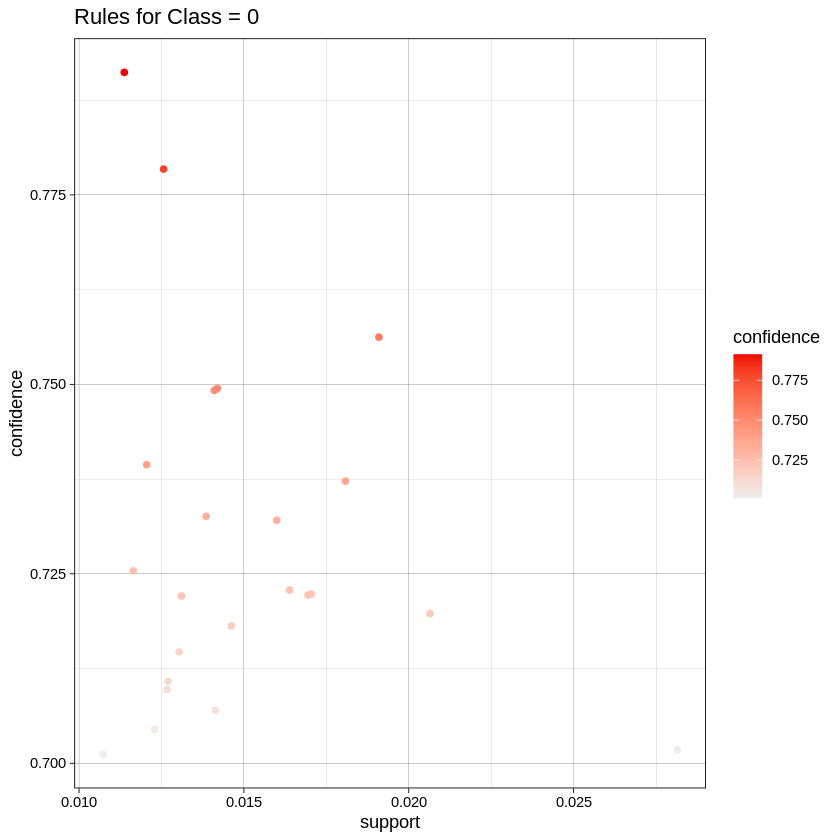

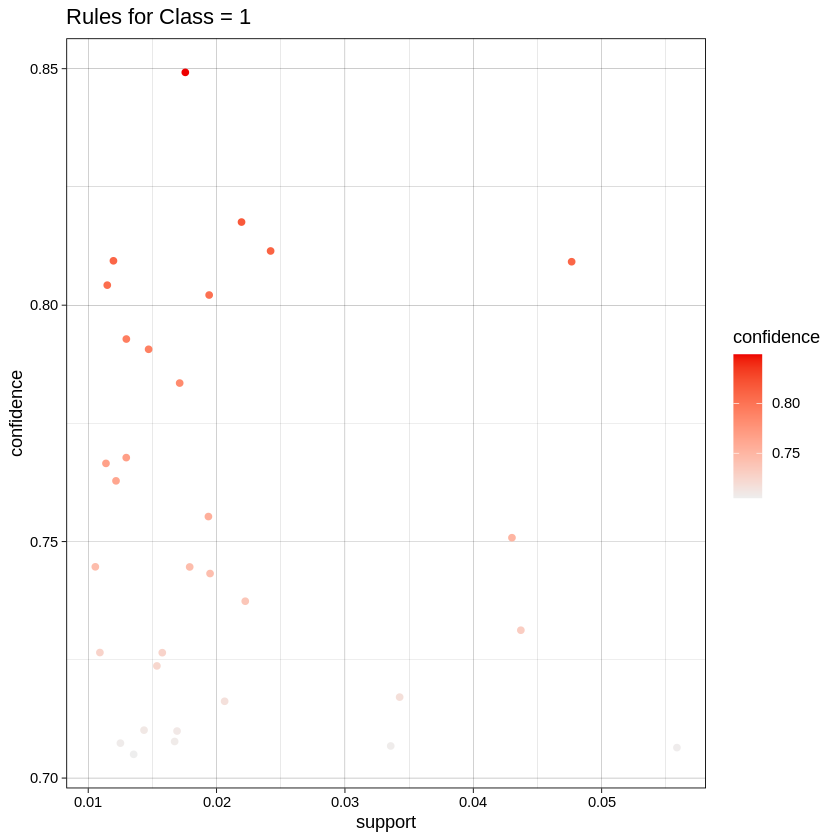

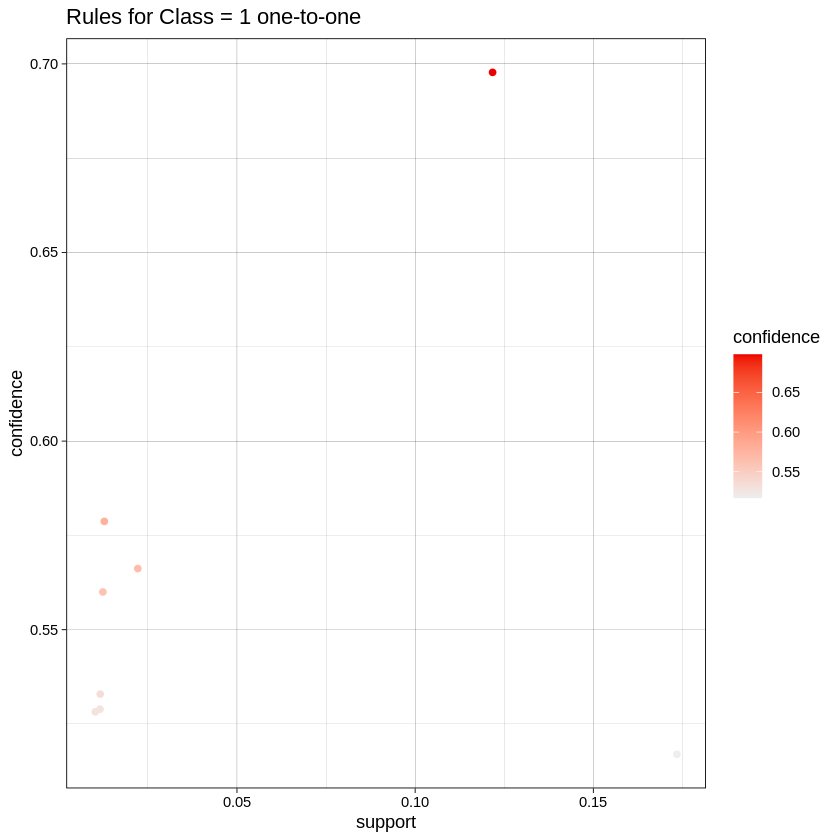

In [ ]:
### Scatterplots

#install.packages("arulesViz")
library(arulesViz)

plot(rules_0, measure = "support", shading = "confidence", main = "Rules for Class = 0")
plot(rules_11, measure = "support", shading = "confidence", main = "Rules for Class = 1")
plot(rules_12, measure = "support", shading = "confidence", main = "Rules for Class = 1 one-to-one")

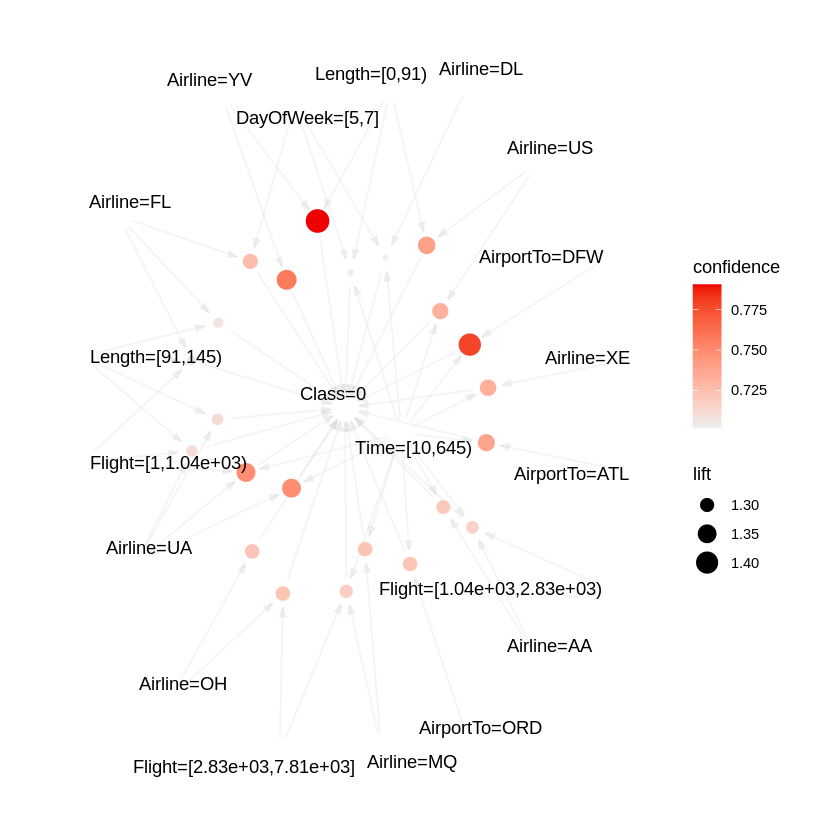

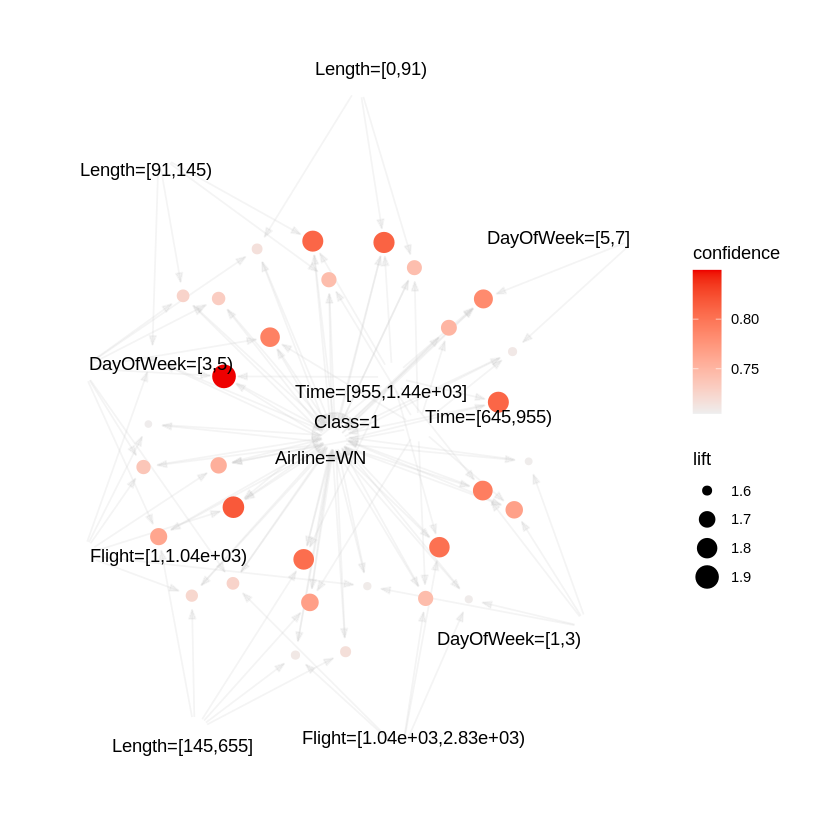

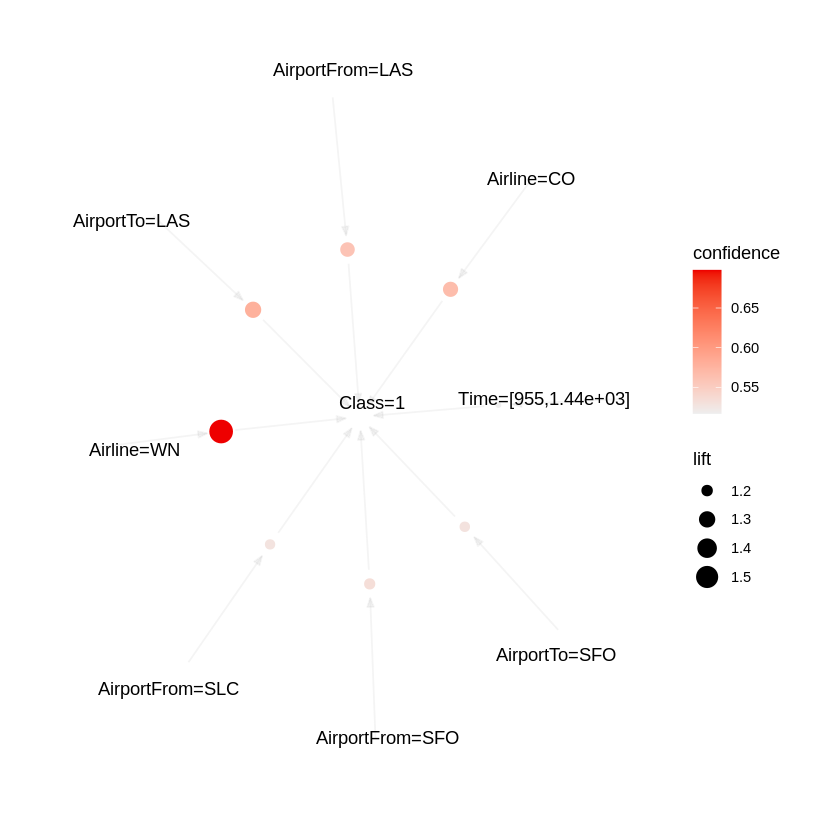

In [ ]:
### Network diagrams

plot(rules_0, method = "graph", measure = "lift", shading = "confidence")
plot(rules_11, method = "graph", measure = "lift", shading = "confidence")
plot(rules_12, method = "graph", measure = "lift", shading = "confidence")


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.01      2
 maxlen target  ext
      2  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5393 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[618 item(s), 539382 transaction(s)] done [1.24s].
sorting and recoding items ... [90 item(s)] done [0.06s].
creating transaction tree ... done [0.80s].
checking subsets of size 1 2

Warning message in apriori(trans, parameter = list(support = 0.01, confidence = 0.5, :
“Mining stopped (maxlen reached). Only patterns up to a length of 2 returned!”


 done [0.02s].
writing ... [50 rule(s)] done [0.00s].
creating S4 object  ... done [0.20s].
     lhs                             rhs       support    confidence coverage  
[1]  {AirportFrom=LGA}            => {Class=0} 0.01022096 0.6450216  0.01584591
[2]  {AirportTo=BOS}              => {Class=0} 0.01064366 0.6088663  0.01748112
[3]  {AirportFrom=BOS}            => {Class=0} 0.01059917 0.6056786  0.01749966
[4]  {AirportTo=JFK}              => {Class=0} 0.01094401 0.6220232  0.01759421
[5]  {AirportFrom=JFK}            => {Class=0} 0.01030995 0.5856150  0.01760533
[6]  {AirportTo=MSP}              => {Class=0} 0.01021354 0.5411060  0.01887531
[7]  {AirportFrom=MCO}            => {Class=0} 0.01112013 0.5660627  0.01964470
[8]  {AirportTo=CLT}              => {Class=0} 0.01403829 0.6802012  0.02063843
[9]  {AirportFrom=CLT}            => {Class=0} 0.01214538 0.5884308  0.02064029
[10] {Airline=AS}                 => {Class=0} 0.01405127 0.6607096  0.02126693
[11] {Airline=OH}           

Warning message in apriori(trans, parameter = list(support = 0.01, confidence = 0.5, :
“Mining stopped (maxlen reached). Only patterns up to a length of 2 returned!”


 done [0.01s].
writing ... [8 rule(s)] done [0.00s].
creating S4 object  ... done [0.19s].
    lhs                      rhs       support    confidence coverage  
[1] {AirportFrom=SLC}     => {Class=1} 0.01025618 0.5282154  0.01941667
[2] {AirportFrom=SFO}     => {Class=1} 0.01164481 0.5329204  0.02185093
[3] {AirportTo=SFO}       => {Class=1} 0.01156323 0.5289179  0.02186206
[4] {AirportTo=LAS}       => {Class=1} 0.01278686 0.5787045  0.02209566
[5] {AirportFrom=LAS}     => {Class=1} 0.01237342 0.5599933  0.02209566
[6] {Airline=CO}          => {Class=1} 0.02216796 0.5661995  0.03915221
[7] {Airline=WN}          => {Class=1} 0.12172635 0.6977587  0.17445336
[8] {Time=[955,1.44e+03]} => {Class=1} 0.17345221 0.5169523  0.33552844
    lift     count
[1] 1.185820  5532
[2] 1.196383  6281
[3] 1.187397  6237
[4] 1.299166  6897
[5] 1.257160  6674
[6] 1.271093 11957
[7] 1.566437 65657
[8] 1.160535 93557


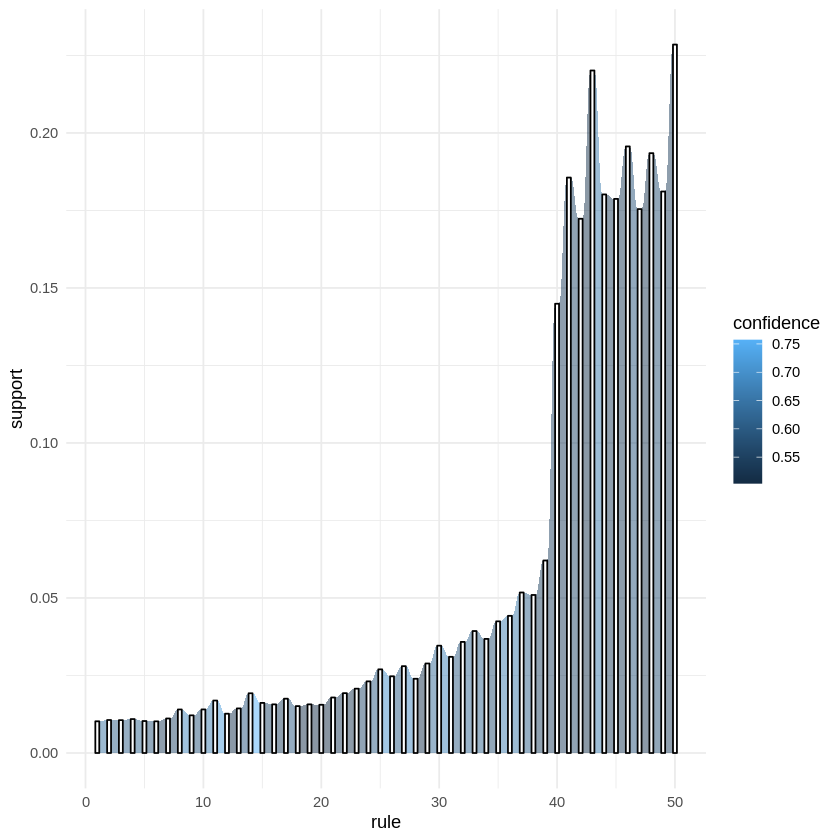

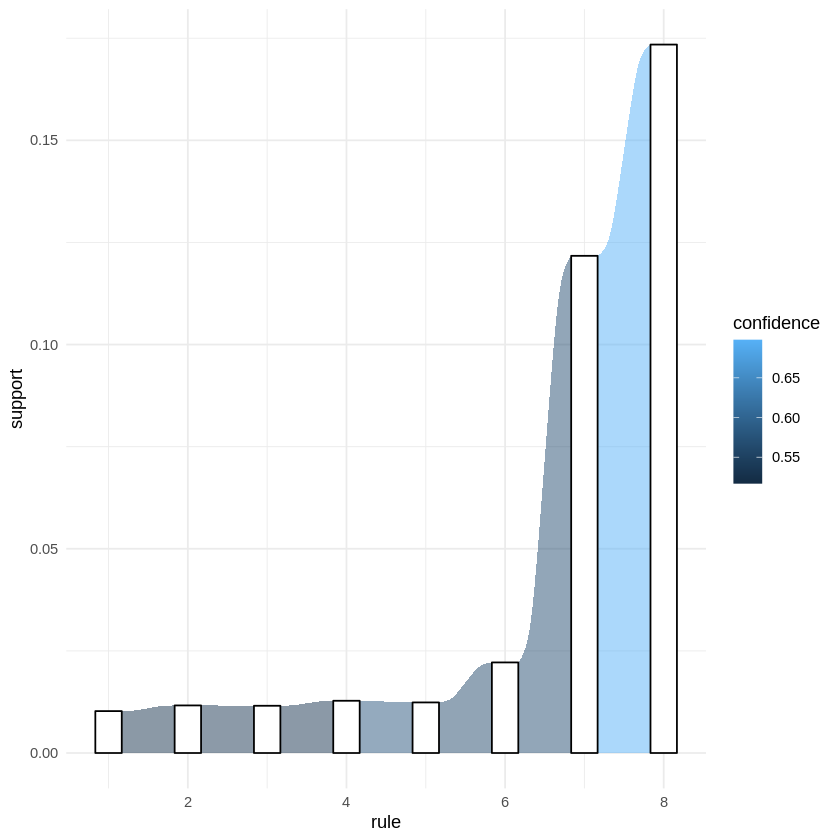

In [ ]:
### Alluvial

#install.packages("ggalluvial")
library(ggalluvial)

#install.packages("alluvial")
rules_00 <- apriori(trans, parameter=list(support=0.01, confidence=0.5, target="rules", maxlen = 2, minlen = 2), appearance=list(rhs=c("Class=0")))
alluvial_data <- as.data.frame(inspect(rules_00))
alluvial_data$rule <- seq(1:nrow(alluvial_data))

# Crearea graficului alluvial
ggplot(alluvial_data, aes(x = rule, stratum = lhs, alluvium = rhs, y = support)) +
  geom_flow(stat = "alluvium", lode.guidance = "frontback", aes(fill = confidence)) +
  geom_stratum() +
  theme_minimal()


rules_111 <- apriori(trans, parameter=list(support=0.01, confidence=0.5, target="rules", maxlen = 2, minlen = 2), appearance=list(rhs=c("Class=1")))
alluvial_data <- as.data.frame(inspect(rules_111))
alluvial_data$rule <- seq(1:nrow(alluvial_data))

# Crearea graficului alluvial
ggplot(alluvial_data, aes(x = rule, stratum = lhs, alluvium = rhs, y = support)) +
  geom_flow(stat = "alluvium", lode.guidance = "frontback", aes(fill = confidence)) +
  geom_stratum() +
  theme_minimal()
